# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

# Consigna

Elige una de las tres opciones de aplicación para elaborar tu proyecto. El objetivo es que apliques las herramientas aprendidas en el dominio que hayas seleccionado. Verás que para cualquiera de las opciones, el trabajo se organiza en tres partes:

## Parte A - Exploración de Datos

Todo proyecto de Ciencia de Datos empieza con un Análisis Exploratorio de Datos. Y todo Análisis Exploratorio de Datos debe responder preguntas.

## Parte B - Modelo de Machine Learning

En esta sección deberás aplicar las técnicas de Machine Learning aprendidas para crear un modelo predictivo a partir del dataset provisto.

## Parte C - Investigación

Las preguntas y cosas para probar nunca se agotan. El objetivo de esta sección es que sugieras cómo continuarías el proyecto, con el fin de mejorar el modelo o responder una pregunta que consideres interesante. En todos los notebooks dejamos algunas sugerencias, pero puedes proponer otras.

# Importación de librerías de utilidad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import spacy
import re
import nltk
import itertools
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Parte A - Exploración de Datos y Procesamiento Natural del Lenguaje

### Carga del dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# CARGO EL DATASET:
dataset = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Proyecto - NLP Amazon/dataset_amazon/dataset_es_train.json", lines = True)

Visualizo las 5 primeras instancias de los datos junto con todas su columnas para tener un primer pantallazo de los mismos:

In [4]:
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


### Manipulación del Dataset

Elimino las columnas que no son relevantes como los IDs de los productos y usuarios.

In [5]:
dataset = dataset.drop(columns = ['review_id', 'product_id', 'reviewer_id'])

Reimprimo las 5 primeras instancias del dataset para poder ver cómo quedó con los cambios aplicados:

In [6]:
dataset.head()

,stars,review_body,review_title,language,product_category
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


### Visualización de los datos

A continuación, voy a analizar la cantidad de categorías diferentes que existen por cada columna restante del dataset ya manipulado.

#### Dataset Completo

In [7]:
dataset.shape

(200000, 5)

El dataset posee un total de 200000 instancias y tiene 4 columnas de importancia.

#### Número de estrellas

5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64


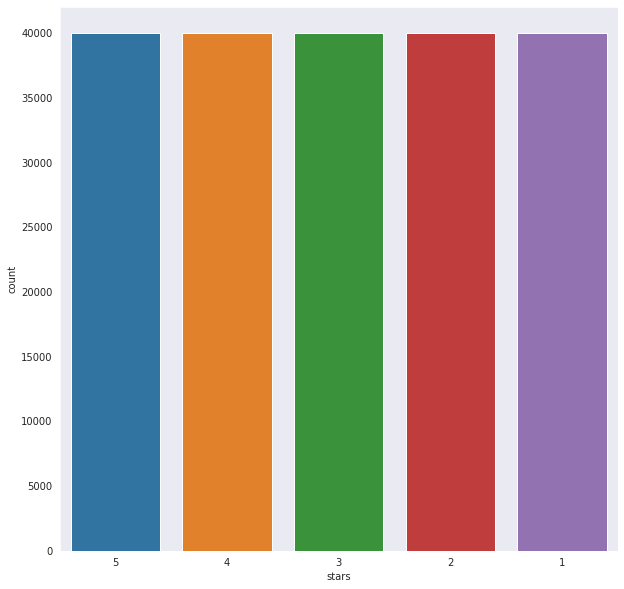

In [8]:
print(dataset['stars'].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(data = dataset, x = 'stars', order = dataset['stars'].value_counts().index)
plt.grid(axis = 'y')

A partir del gráfico, puedo concluir que el dataset se encuentra balanceado en esta categoría debido a que tiene equitativamente distribuidas las instancias por cada categoría de estrella.

es    200000
Name: language, dtype: int64


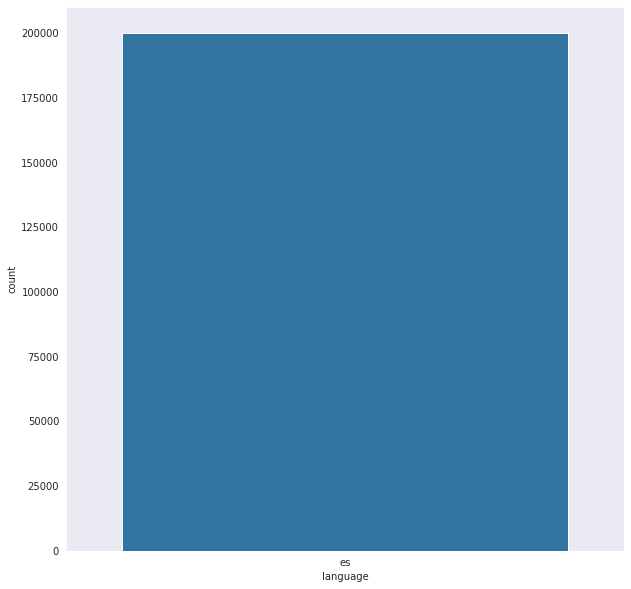

In [9]:
print(dataset['language'].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(data = dataset, x = 'language', order = dataset['language'].value_counts().index)
plt.grid(axis = 'y')

El dataset posee una sola categoría (español) en esta columna, por lo tanto podemos desligarnos de ella eliminándola:

In [10]:
dataset = dataset.drop(columns = ['language'])

#### Reviews

La cantidad de categorias registradas en el dataset es de: 30
home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch               

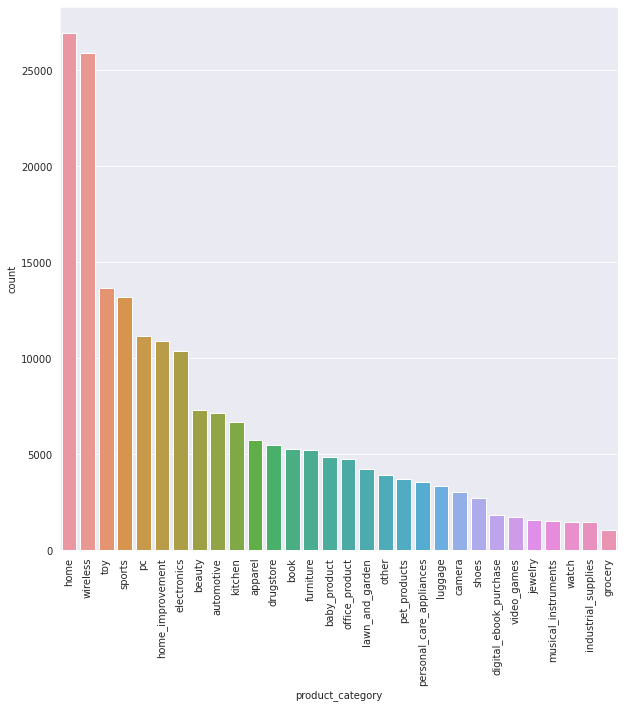

In [11]:
print('La cantidad de categorias registradas en el dataset es de: ' + str(len(dataset['product_category'].unique())))
print(dataset['product_category'].value_counts())
plt.figure(figsize=(10,10))
categorias = sns.countplot(data = dataset, x = 'product_category', order = dataset['product_category'].value_counts().index)
for i in categorias.get_xticklabels():
    i.set_rotation(90)

En total hay 30 categorías diferentes. En esta categoría (Reviews) es donde se puede observar la menor igualdad en la distribución de las categorias, dado que las dos categorías con mayor cantidad de instancias; home y wireless poseen más de 25000. Mientras que las categorías con menos instancias, industrial_supplies y grocery, poseen menos de 1500.


#### Segundo análisis dataset completo

Como efectué algunos cambios, re-analizo el shape del dataset para poder ver el estado resultante del mismo

In [12]:
dataset.shape

(200000, 4)

Como se puede ver, el dataset a trabajar posee un total de 200000 instacias con 3 columnas de importancia.

### Muestra aleatoria de algunos reviews:

A continuación, voy a mostrar al azar 10 reviews en el dataset junto con su index y la cantidad de estrellas que el usuario asignó

In [13]:
i = 0
while i < 11:
    index_random = np.random.randint(0, 200000)
    review = dataset.review_body[index_random]
    estrella = dataset.stars[index_random]
    print(index_random, review, estrella)
    print()
    i += 1

25478 La grabadora dejo de funcionar al tercer dia de uso. No se parece en nada a lo que salia en la foto. 1

73542 Son un poco más pequeños que la pantalla original y muy frágiles, se astillan con nada, en otro móvil tuve un protector más de 2 años y ningún problema estos se han roto/astillado todos en menos de 3 meses 2

26269 Se me rompió uno al sacarlo del cargador. Calidad nefasta para el precio que tiene, no lo recomiendo. Que pesaos con las palabras que faltan para la opinión por Dios. 1

128891 Me llego muy pronto , es grande y bonita 4

142657 Muy buena calidad en relación con el precio. Lo uso como monitor para un MacBook pro y estoy contenta con la compra 4

95481 Dispara bien y con mucha fuerza.... Lo malo es que los dardos se encasquillan con bastante facilidad... La verdad es que mola bastante 3

51831 No era lo esperado, son de mala calidad y bastante feas 2

182037 Excelente, buen producto recomendable. 5

39774 Tres cambios y vuelve a entrar agua incluso por una ducha.

## Procesamiento Natural del Lenguaje

En esta sección voy a trabajar con la librería de NLP Spacy, Re y NLTK para poder realizar los siguientes pasos:

* Reducción de caracteres a su equivalente en minúscula.

* Eliminación de simbología que no aporte al análisis de las palabras escritas.

* Tokenización de las oraciones tipo "string" en el Data Frame.

* Lemmatización de los tokens para poder llevarlos a una expresión más generalizada.

* Eliminación de StopWords definidas por la librería Spacy.

Importo de la librería Spacy, el modelo utilizado para Lemmatización en español. Además, deshabilito la busqueda de tagger y parser que no son de utilidad en este trabajo para poder así acelerar el procedimiento de Lemmatización que suele ya tardar mucho tiempo en realizarse.

In [14]:
#You first need to download the data:

!spacy download es_core_news_sm

#Then Restart the runtime, after which your code will run correctly:

     |████████████████████████████████| 16.2 MB 4.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [15]:
import es_core_news_sm
spacy.prefer_gpu()
nlp = es_core_news_sm.load(disable = ["tagger", "parser"])

Defino 2 funciones de utilidad, una para ver la frecuencia de palabras en el set de datos según la estrella deseada, y otra para poder realizar filtraciones de palabras deseadas.

In [16]:
def frecuencia_palabras(datos, estrella = None):
    tokens = []
    if estrella != None:
        datos = datos[datos.stars == estrella]
    for i in range(datos.shape[0]):
        token = datos.iloc[i].review_body_stem 
        token = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(token)
        tokens.append(token)
    lista_tokens = list(itertools.chain(*tokens))
    frec = nltk.FreqDist(lista_tokens)
    df = pd.DataFrame(list(frec.items()), columns = ['palabra', 'frecuencia'])
    df = df.sort_values(by = 'frecuencia', axis = 0, ascending = False)
    print(df.head(30))
    plt.figure(figsize = (10,20))
    plot = sns.barplot(x  = df.iloc[:100].palabra, y = df.iloc[:100].frecuencia)
    for item in plot.get_xticklabels():
        item.set_rotation(90)
    plt.show()

In [17]:
def filtrar(datos, feature, filtro):
    lista_filtros = []
    for i in datos[feature]:
        token = nltk.tokenize.word_tokenize(i)
        token = [w for w in token if not w in filtro]
        token = " ".join(token)
        lista_filtros.append(token)
    return lista_filtros

Almaceno las "Stopwords" en una variable.

In [18]:
stopwords = nlp.Defaults.stop_words

In [19]:
stopwords

{'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'cosas',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 

Realizo los procedimientos de NLP previamente explicados paso a paso.

In [20]:
reviews_procesados = []

for i in dataset['review_body']:
    
    # Elimino símbolos en las frases con la siguiente expresión regular.
    
    i = re.sub("[^a-zA-Z]"," ",str(i))
    
    # Paso todas las palabras a minúsculas.
    
    i = i.lower()
    
    # Accedo a la librería Spacy para utilizar sus herramientas en cada frase.
    
    doc = nlp(i)
    
    # Tokenizo para separar las palabras y almaceno en una nueva lista la lemmatización del token con Spacy.
    
    i = [str(token.lemma_) for token in doc if not token in stopwords]
    
    # Elimino los tokens inferiores a 3 letras.
    
    i = [token for token in i if len(token) > 3]
    
    # Uno los tokens de la lista lemmatizados por separado en una sola variable y lo almaceno en la nueva lista.
    
    i = " ".join(i)
    
    reviews_procesados.append(i)

Una vez obtenida la nueva lista con los tokens lemmatizados, la almaceno en el Dataframe de pandas como una nueva columna.

In [21]:
dataset['review_body_stem'] = reviews_procesados

Visualizo que se haya cargado correctamente en el Dataframe.

In [22]:
dataset.head()

,stars,review_body,review_title,product_category,review_body_stem
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,nadar bueno pantalla menos mesar haber recibir...
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,horrible tener comprar otro porque nosotros sa...
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,obligar comprar unidad llegar solo haber forma...
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,entrar descalificar vendedor solo poder decir ...
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,llegar tardar tallar equivocar


Almaceno los datos procesados en un nuevo archivo CSV para no tener que reprocesarlos y poder trabajar directamente con el nuevo archivo CSV los modelos de Machine Learning y para filtraciones.

In [23]:
dataset.to_csv('Dataset_procesado.csv')

### Análisis de la repetición de palabras en cada frase

Ahora voy a verificar la cantidad de veces que las palabras se repiten según el tipo de categoría para ver si existen ciertas palabras que se relacionen con una categoría de estrella. Para ello, utilizo la función previamente definida, "frecuencia_palabras", para poder obtener un gráfico de barras que muestre la frecuencia de las primeras 100 palabras por cada categoría de estrella.

#### 1 Estrella

       palabra  frecuencia
5        haber       22811
44       parir       12063
17     segundo       10773
10       tener        9570
49        pero        8735
41    producto        7679
26      llegar        7547
0        nadar        7291
219       este        7228
100      metro        6665
11     comprar        6179
103  funcionar        5415
46       hacer        5265
36       poder        5094
126      comer        4878
85       estar        4463
96        bien        4449
69     calidad        4360
120      poner        4085
12        otro        4069
68        malo        3842
13      porque        3818
178       todo        3649
97        usar        3499
52    devolver        3453
208      pedir        3413
39     esperar        3327
83        poco        2943
231      mucho        2911
37       decir        2907


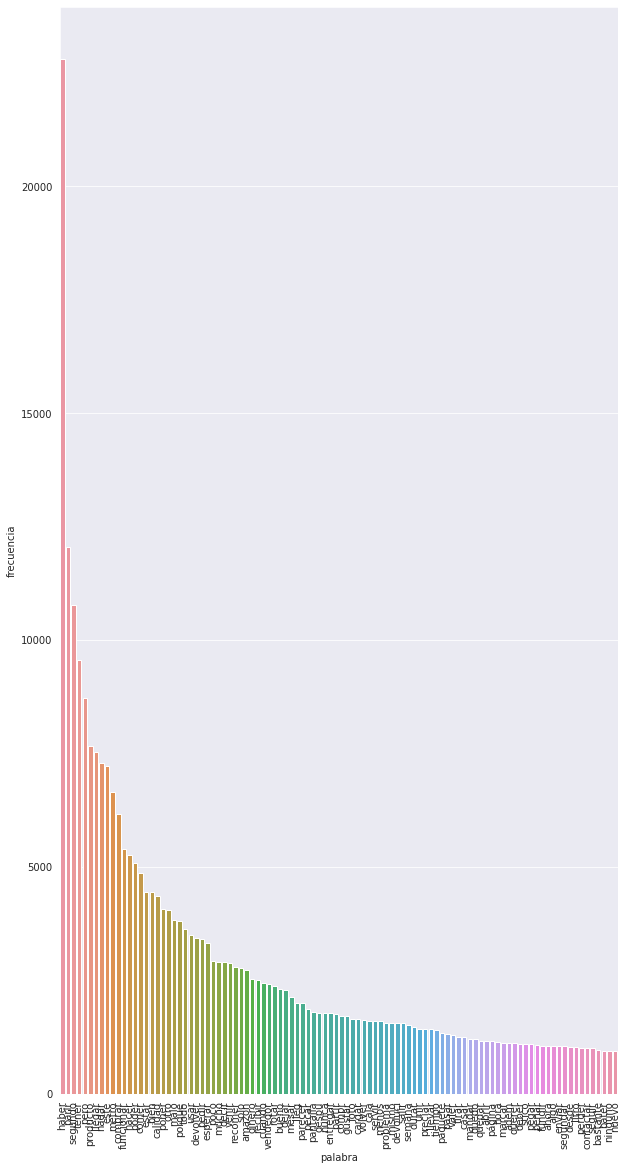

In [24]:
frecuencia_palabras(dataset, estrella = 1)

#### 2 Estrella

       palabra  frecuencia
40       haber       18071
28        pero       17222
21       parir       15808
45     segundo       13642
51       tener       12472
2         bien        9629
44       metro        9358
67        este        7045
23        poco        6033
92     calidad        5909
73       comer        5816
136      mucho        5461
70       bueno        5237
38       poder        5152
202      hacer        5151
63        otro        4988
69    producto        4949
5      comprar        4809
104  funcionar        4377
121       todo        4330
43      porque        4151
39        usar        4104
20       nadar        4081
60       estar        3706
41       poner        3569
148     llegar        3461
16       pecar        3338
196    preciar        3254
74       venir        3164
195    esperar        3113


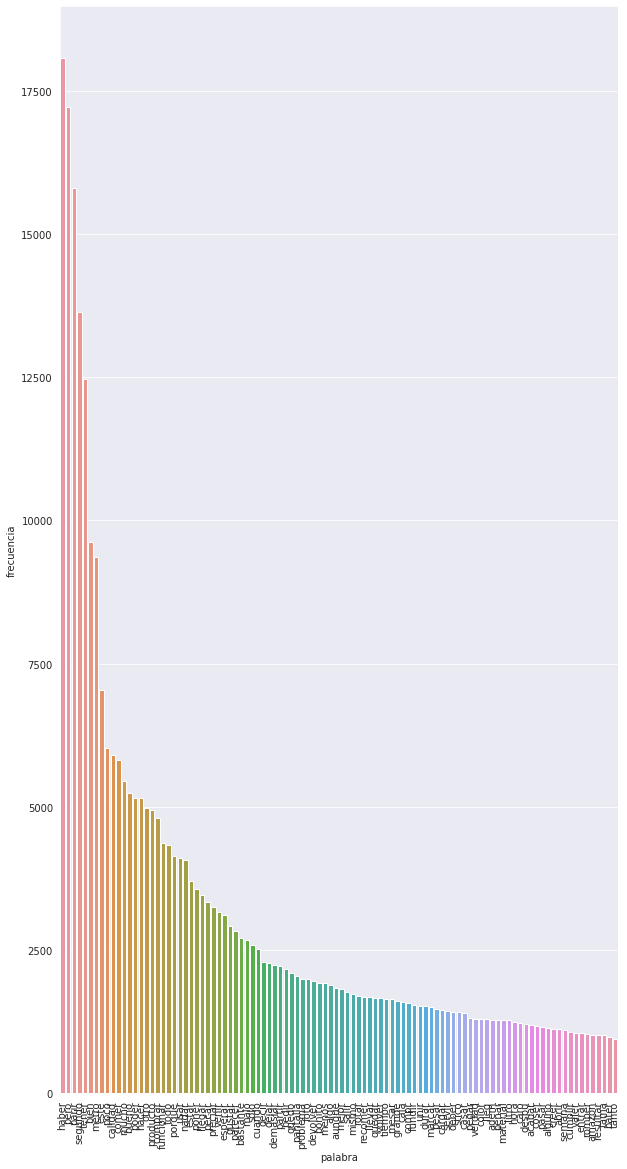

In [25]:
frecuencia_palabras(dataset, estrella = 2)

#### 3 Estrella

       palabra  frecuencia
24        pero       20221
9        parir       17266
1         bien       13948
65     segundo       13825
146      haber       13727
15       tener       11963
2        metro        9931
115      bueno        7420
49        poco        7257
26        este        6801
118    calidad        5996
333      comer        5869
53       mucho        5440
111    preciar        5379
66       poder        5019
5        hacer        4661
68        todo        4380
82    producto        4221
313       otro        3974
56        usar        3736
7        pecar        3736
309     porque        3498
95    bastante        3393
21       poner        3391
175    esperar        3366
186     gustar        3337
42   funcionar        3281
253    comprar        3188
55       venir        2895
233     aunque        2882


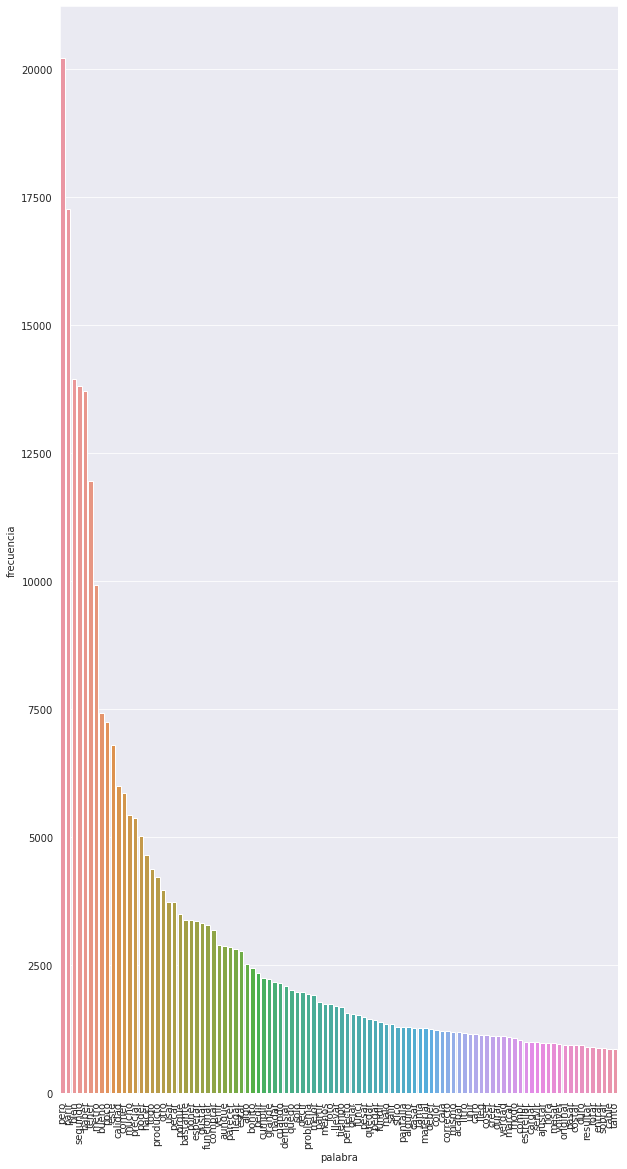

In [26]:
frecuencia_palabras(dataset, estrella = 3)

#### 4 Estrella

       palabra  frecuencia
68       parir       17761
11        bien       14207
8         pero       13065
1        bueno       12812
61       haber       11323
34     segundo       11292
0        tener       10446
268      metro        8042
27     calidad        7494
100    preciar        7063
204       poco        6248
101       este        5618
6        comer        5414
24        todo        4956
143   producto        4536
20       mucho        4516
122      poder        4327
41     comprar        3967
43       hacer        3847
131       usar        3824
201   bastante        3767
16    perfecto        3762
64      gustar        3580
202    cumplir        3370
36   funcionar        3283
224      poner        2977
39       estar        2888
118       otro        2878
18      aunque        2802
47       pecar        2781


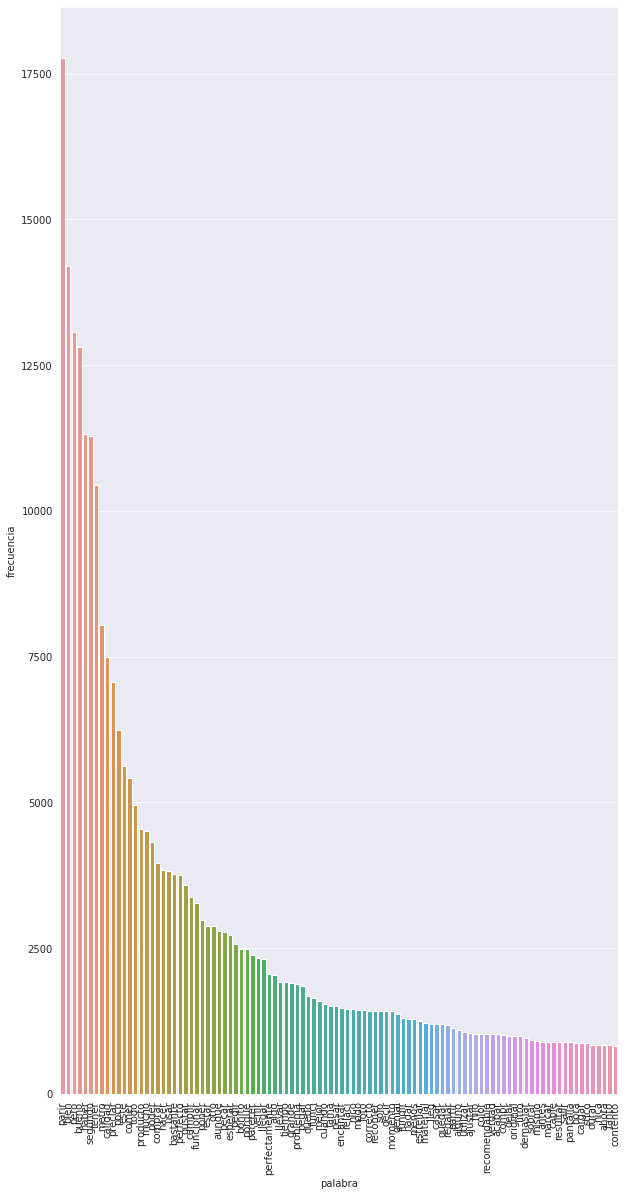

In [27]:
frecuencia_palabras(dataset, estrella = 4)

#### 5 Estrella

           palabra  frecuencia
1            parir       17881
27           bueno       13675
40           haber       11078
83         segundo        9607
4            tener        9543
26            bien        9337
24         calidad        8295
31        perfecto        7042
145          metro        6960
107           este        6653
35            todo        6173
92         comprar        6037
25         preciar        5819
169           pero        5697
62           comer        5559
52           mucho        4926
46        producto        4719
12           poder        4313
38        encantar        3933
69           hacer        3763
51            usar        3682
56           estar        3598
198          pedir        3174
291      funcionar        3089
171         gustar        2973
209  perfectamente        2778
58          bonito        2718
21         recomer        2632
173           poco        2571
119         genial        2529


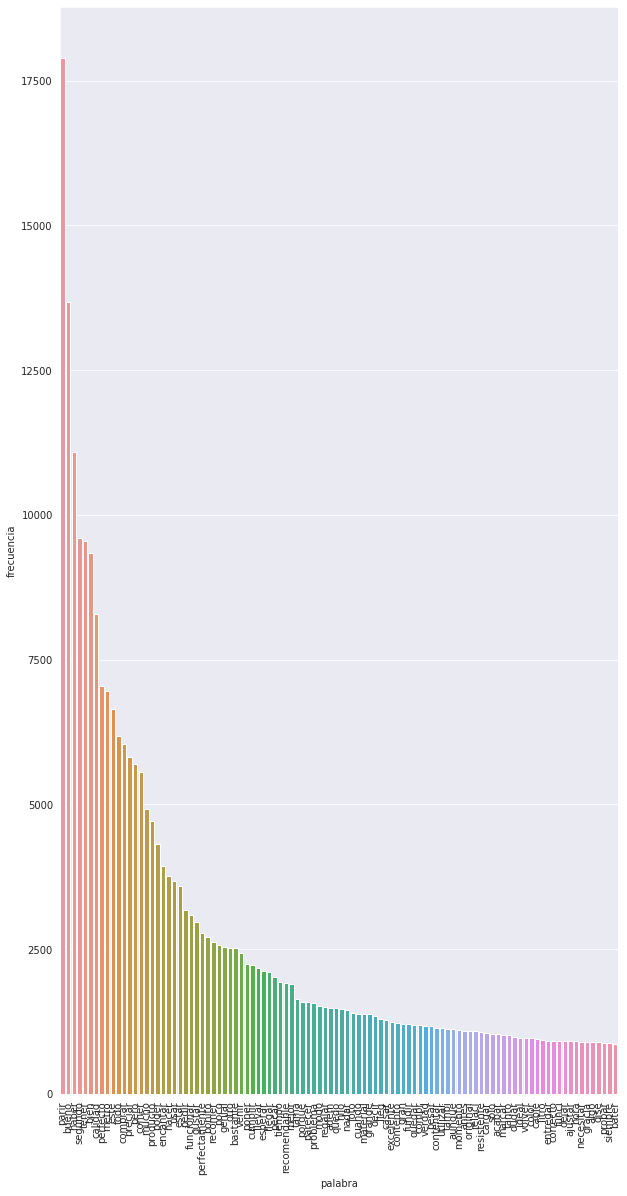

In [28]:
frecuencia_palabras(dataset, estrella = 5)

#### Conclusión: Análisis de la repetición de palabras en cada frase

En base a los gráficos mostrados, podemos obtener ciertas respuestas del set de datos procesado con Spacy. En primer lugar, es claro que hay una gran cantidad de palabras que se repiten en todas las categorias de estrellas existentes en el set de datos como es el caso de:
* haber.

* segundo.

* este.

* estar.

* comprar.

Estas palabras deberían ser filtradas con el propósito de no generar confusión alguna entre features por cada clase.

Se busca tratar de poseer un dataset con features característicos con potencial de diferenciación entre clases de estrellas.

### Filtración de palabras

Luego de haber explorado la cantidad de palabras que se repiten según cada categoría, y de haber visualizado si existe alguna naturaleza de palablas correspondiente a alguna categoría. Realizaré un filtrado de palabras que, al contrario, pueda generar confusión al modelo durante la etapa de aprendizaje. Para ello, defino una lista de palabras a filtrar y la utilizo como argumento en la función predefinida anteriormente. 

In [29]:
filtro = ['haber', 'segundo', 'este', 'estar', 'comprar']

In [30]:
filtros = filtrar(datos = dataset, feature = 'review_body_stem', filtro = filtro)

Almaceno la nueva columna de datos con las palabras filtradas en una nueva columna del Dataframe anterior.

In [31]:
dataset['reviews_filtrados'] = filtros

In [32]:
dataset.head()

,stars,review_body,review_title,product_category,review_body_stem,reviews_filtrados
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,nadar bueno pantalla menos mesar haber recibir...,nadar bueno pantalla menos mesar recibir respu...
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,horrible tener comprar otro porque nosotros sa...,horrible tener otro porque nosotros saber ingl...
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,obligar comprar unidad llegar solo haber forma...,obligar unidad llegar solo formar reclamar aut...
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,entrar descalificar vendedor solo poder decir ...,entrar descalificar vendedor solo poder decir ...
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,llegar tardar tallar equivocar,llegar tardar tallar equivocar


Almaceno el DataFrame con las palabras filtradas en un nuevo archivo CSV para poder utilizarlo en el aprendizaje de los algoritmos de Machine Learning.

In [33]:
dataset.to_csv('Dataset_procesado_2.csv')

In [34]:
dataset = pd.read_csv('Dataset_procesado_2.csv')

### Eliminación de valores faltantes en el dataset debido a la filtración de palabras

Al realizar un filtrado de palabras con alta frecuencia en el dataset. Puede darse la posibilidad de que alguna de las celdas haya quedado sin valores. Por lo tanto, es necesario que imprima la cantidad de valores "NaN" y de eliminar las instancias padezcan esta situación.

In [35]:
dataset.head()

,Unnamed: 0,stars,review_body,review_title,product_category,review_body_stem,reviews_filtrados
0,0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,nadar bueno pantalla menos mesar haber recibir...,nadar bueno pantalla menos mesar recibir respu...
1,1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,horrible tener comprar otro porque nosotros sa...,horrible tener otro porque nosotros saber ingl...
2,2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,obligar comprar unidad llegar solo haber forma...,obligar unidad llegar solo formar reclamar aut...
3,3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,entrar descalificar vendedor solo poder decir ...,entrar descalificar vendedor solo poder decir ...
4,4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,llegar tardar tallar equivocar,llegar tardar tallar equivocar


Imprimo los valores faltantes por columna

In [36]:
dataset.isna().sum()

Unnamed: 0           0
stars                0
review_body          0
review_title         0
product_category     0
review_body_stem     5
reviews_filtrados    9
dtype: int64

Elimino valores faltantes

In [37]:
dataset = dataset.dropna()

Verifico si se eliminaron dichos valores faltantes

In [38]:
dataset.isna().sum()

Unnamed: 0           0
stars                0
review_body          0
review_title         0
product_category     0
review_body_stem     0
reviews_filtrados    0
dtype: int64

# Parte B - Machine Learning

Habiendo terminado la etapa de análisis exploratorio, el filtrado y el procesamiento de los datos. Empezaré a trabajar con la parte B del proyecto, el diseño de algoritmos de Machine Learning. Para realizar esta parte de manera más dinámica. 

En este caso, hay que predecir cuántas estrellas le asignó un usuario a un producto en base a cómo está escrito el review.

Trabajaré con dichos algoritmos mediante el uso de clases. Cada instancia de clase creada corresponde a un modelo de Machine Learning con el cual se trabajará. Voy a explicar paso a paso cómo se crea la instacia de clase y cuáles son sus atributos importantes.

In [39]:
class Modelo:
    
    def __init__(self, X, y, modelo, vector, 
               n_features, cv, min_frec = None, 
               hiperparam = None):
        
        self.X = X
        self.y = y
        self.vector = vector
        self.n_features = n_features
        self.cv = cv
        self.min_frec = min_frec
        self.modelo = modelo
        self.hiperparam = hiperparam
        
        if self.vector == 'Count':
            self.vec = CountVectorizer(max_features = self.n_features,
                                  min_df = self.min_frec)
        elif self.vector == 'TDIDF':
            self.vec = TfidfVectorizer(max_features = self.n_features,
                                  min_df = self.min_frec)
        
        self.matriz = self.vec.fit_transform(self.X)
        
    def entrenar_modelo(self):
        
        if self.modelo == 'NB':
            self.algoritmo = GaussianNB()
            
        elif self.modelo == 'RF':
            self.algoritmo = RandomForestClassifier(n_estimators = self.hiperparam)
        
        elif self.modelo == 'ABC':
            self.algoritmo = AdaBoostClassifier(n_estimators = self.hiperparam)
            
        else:
            print('No se seleccionó un modelo apropiado')
        
        self.resultados_modelo = cross_validate(estimator = self.algoritmo, 
                                                X = self.matriz.toarray(), 
                                                y = self.y, cv = self.cv)
        
    def mostrar_resultados(self):
        
        print('Los resultados de accuracy son: ' + 
              str(np.round(self.resultados_modelo['test_score'], 3)))
        print('El resultado medio es: ' + 
              str(round(self.resultados_modelo['test_score'].mean(), 3)) 
              + ' \u00B1 ' +
              str(round(self.resultados_modelo['test_score'].std(), 3)))
        
        self.resultado_medio = round(self.resultados_modelo['test_score'].mean(), 3)
        self.resultado_std = round(self.resultados_modelo['test_score'].std(), 3)
        
    def matriz_confusion(self, test_size):
        
        X_train, X_test, y_train, y_test = train_test_split(self.matriz.toarray(), 
                                                            self.y, 
                                                            test_size = test_size)
        self.algoritmo.fit(X = X_train, y = y_train)
        y_pred_train = self.algoritmo.predict(X = X_train)
        names = ["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"]
        print(f'El valor de accuracy del modelo en el entrenamiento es de: {round(accuracy_score(y_train, y_pred_train), 3)}')
        cm = confusion_matrix(y_train, y_pred_train)
        f, ax = plt.subplots(figsize = (5, 5))
        sns.heatmap(cm, annot = True, linewidth = .5, linecolor = "k", fmt = ".0f", ax = ax)
        plt.xlabel("y_pred_train")
        plt.ylabel("y_real")
        plt.title("Matriz de Confusión Entrenamiento")
        ax.set_xticklabels(names)
        ax.set_yticklabels(names)
        plt.show()
        y_pred_test = self.algoritmo.predict(X = X_test)
        
        print(f'El valor de accuracy del modelo en la prueba es de: {round(accuracy_score(y_test, y_pred_test), 3)}')
        cm2 = confusion_matrix(y_test, y_pred_test)
        f, ax = plt.subplots(figsize = (5, 5))
        sns.heatmap(cm2, annot = True, linewidth = .5, linecolor = "k", fmt = ".0f", ax = ax)
        plt.xlabel("y_pred_test")
        plt.ylabel("y_real")
        plt.title("Matriz de Confusión Prueba")
        ax.set_xticklabels(names)
        ax.set_yticklabels(names)
        plt.show()
    
    def palabras_importantes(self):
        
        if self.modelo != 'RF':
            print('No se seleccionó un modelo de Random Forest')
            return
        
        importances = self.algoritmo.feature_importances_
        all_words = self.vec.get_feature_names()
        columns = all_words

        # Sort by importance and take the first 20
        indices = np.argsort(importances)[::-1]
        indices = indices[:20]
        selected_columns = [columns[i] for i in indices]
        selected_importances = importances[indices]

        # Graph the results
        plt.figure(figsize = (15,8))
        sns.barplot(selected_columns, selected_importances)
        plt.xlabel('Palabras importantes')
        plt.ylabel('Porcentaje de importancia')
        plt.show()
    
    def optimizar_hiperparametros(self, metodo, cantidad_estimadores, limites, cv):
        
        if metodo == 'grid':

            n_estimators = np.round(np.linspace(start = limites[0], 
                                   stop = limites[1], 
                                   num = cantidad_estimadores, dtype = np.int32))
            estimator_grid = {'n_estimators': n_estimators}
            clf = GridSearchCV(self.algoritmo, estimator_grid, cv = cv)
            
        elif metodo == 'random':
            
            estimator_dist = {'n_estimators': sp.stats.randint(limites[0], limites[0])}
            clf = RandomizedSearchCV(self.algoritmo, estimator_dist, cv = cv)
            
        else:
            print('No se seleccionó un método de optimización apropiado')
        
        clf.fit(self.matriz.toarray(), self.y)    
        
        return pd.DataFrame(clf.cv_results_)

Antes de crear las primeras instancias, creo una lista vacía que utilizaré para almacenar el desempeño de cada modelo de Machine Learning.

In [40]:
lista_resultado_modelos = []

### Definición de Modelos

#### Naive Bayes con Count Vector

Empiezo el desafío de clasificación con un modelo benchmark, para ver cómo es el desempeño de un modelo sencillo con el dataset obtenido. Para poder probar la performance con este tipo de modelo, debo crear una instancia de la clase "Modelo" definida anteriormente. Además, en la creación de la instancia, debo definir primero con qué tipo de vector de palabras va a trabajar el modelo:
* Count Vector
* TFIDF

Para generar un modelo de Naive Bayes que trabaje con un Count vector con la clase "Modelo", debo colocar los siguientes argumentos para que se cree la instancia exitosamente:

* Data: dataset['reviews_filtrados'].values
* Etiqueta: dataset['stars'].values
* Modelo: 'NB' (Naive Bayes Gaussiano)
* Vector de palabras: 'Count' (Tipo Count)
* Número de features para el vector: 250 features
* Cantidad de Folds: 5
* Mínima frecuencia de palabra en dataset para incluir en el vector: 10
* Hiperparámetro: None

In [41]:
NB1 = Modelo(dataset['reviews_filtrados'].values, 
              dataset['stars'].values, 'NB', 'Count', 
              250, 5, 10, None)

Utilizo el método de clase "entrenar_modelo" para poder entrenarlo con los datos ingresados al definir la clase.

In [42]:
NB1.entrenar_modelo()

Muestro los resultados de cada "Fold" con el método de clase "mostrar_resultados"

In [43]:
NB1.mostrar_resultados()

Los resultados de accuracy son: [0.381 0.378 0.38  0.377 0.38 ]
El resultado medio es: 0.379 ± 0.001


Agrego el promedio y desvío de los resultados de los Folds en la lista vacía definida anteriormente

In [44]:
lista_resultado_modelos.append(['Naive Bayes Count', 
                                NB1.resultado_medio, 
                                NB1.resultado_std])

Hago otro análisis de desempeño del mismo modelo utilizando ahora la matriz de confusión con una división de entrenamiento/prueba de los datos del 67 % / 33 % respectivamente. Imprimo las matrices de confusión tanto para el set de datos de entrenamiento, como en el set de datos de prueba.

El valor de accuracy del modelo en el entrenamiento es de: 0.384


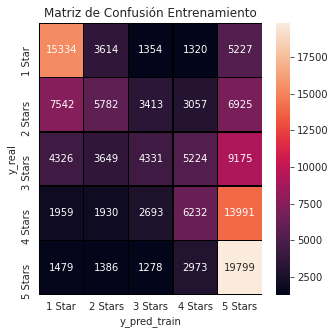

El valor de accuracy del modelo en la prueba es de: 0.375


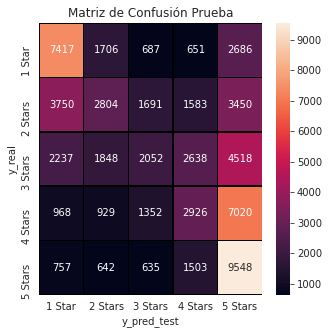

In [45]:
NB1.matriz_confusion(0.33)

#### Random Forest con Count Vector

Para definir un modelo de Random Forest que trabaje con un vector Count con la clase modelo debo colocar lo siguiente en los argumentos:

* Data: dataset['reviews_filtrados'].values
* Etiqueta: dataset['stars'].values
* Modelo: 'RF' (Clasificador Random Forest)
* Vector de palabras: 'Count' (Tipo Count)
* Número de features para el vector: 250 features
* Cantidad de Folds: 5
* Mínima frecuencia de palabra en dataset para incluir en el vector: 10
* Hiperparámetro: 250 árboles

In [46]:
RF1 = Modelo(dataset['reviews_filtrados'].values, 
              dataset['stars'].values, 'RF', 'Count', 
              250, 5, 10, 250)

El resto de los procedimientos son equivalentes a los del modelo anterior

In [47]:
RF1.entrenar_modelo()

In [48]:
RF1.mostrar_resultados()

Los resultados de accuracy son: [0.436 0.428 0.428 0.428 0.435]
El resultado medio es: 0.431 ± 0.003


In [49]:
lista_resultado_modelos.append(['Random Forest Count', 
                                RF1.resultado_medio, 
                                RF1.resultado_std])

El valor de accuracy del modelo en el entrenamiento es de: 0.937


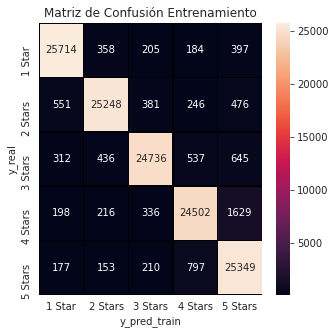

El valor de accuracy del modelo en la prueba es de: 0.43


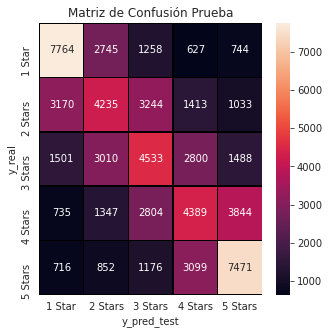

In [50]:
RF1.matriz_confusion(0.33)

Además, las intancias de clases de modelos de Random Forest pueden utilizar el método "palabras_importantes" para poder visualizar cuáles fueron verdaderamente las palabras que más influyeron en mejorar la performance de clasificación del modelo.

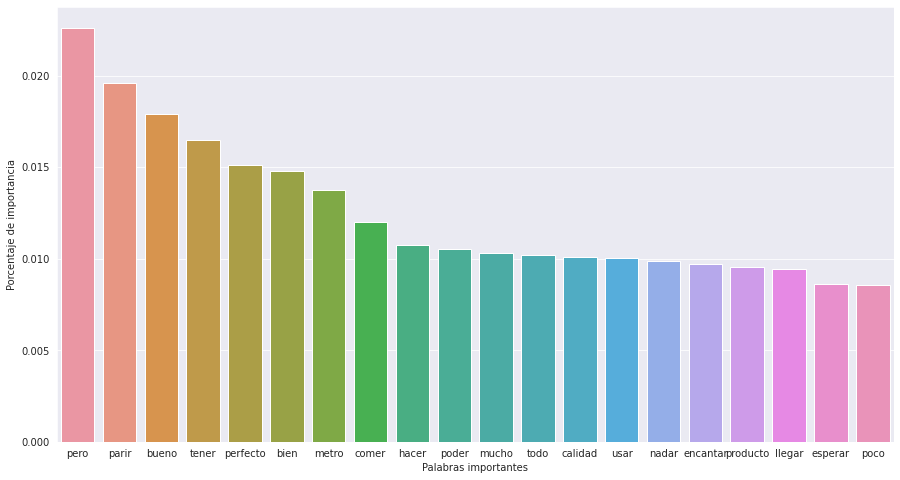

In [51]:
RF1.palabras_importantes()

#### AdaBoost con Count Vector

Para definir un modelo de AdaBoost que trabaje con un vector Count con la clase modelo debo colocar lo siguiente en los argumentos:

* Data: dataset['reviews_filtrados'].values
* Etiqueta: dataset['stars'].values
* Modelo: 'ABC' (Clasificador AdaBoost)
* Vector de palabras: 'Count' (Tipo Count)
* Número de features para el vector: 250 features
* Cantidad de Folds: 5
* Mínima frecuencia de palabra en dataset para incluir en el vector: 10
* Hiperparámetro: 250 estimadores

In [52]:
ABC1 = Modelo(dataset['reviews_filtrados'].values, 
              dataset['stars'].values, 'ABC', 'Count', 
              250, 5, 10, 250)

In [53]:
ABC1.entrenar_modelo()

In [54]:
ABC1.mostrar_resultados()

Los resultados de accuracy son: [0.449 0.449 0.448 0.447 0.449]
El resultado medio es: 0.448 ± 0.001


In [55]:
lista_resultado_modelos.append(['AdaBoost Count', 
                                ABC1.resultado_medio, 
                                ABC1.resultado_std])

El valor de accuracy del modelo en el entrenamiento es de: 0.45


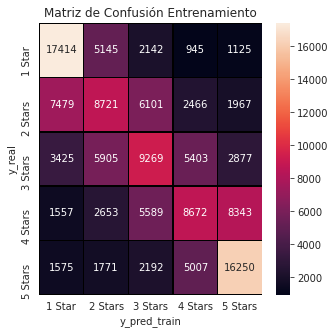

El valor de accuracy del modelo en la prueba es de: 0.452


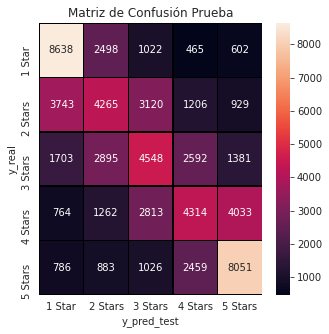

In [56]:
ABC1.matriz_confusion(0.33)

#### Naive Bayes con TFIDF Vector

Para definir un modelo de Naive Bayes que trabaje con un vector TFIDF con la clase modelo debo colocar lo siguiente en los argumentos:

* Data: dataset['reviews_filtrados'].values
* Etiqueta: dataset['stars'].values
* Modelo: 'NB' (Naive Bayes Gaussiano)
* Vector de palabras: 'TFIDF' (Tipo TFIDF)
* Número de features para el vector: 250 features
* Cantidad de Folds: 5
* Mínima frecuencia de palabra en dataset para incluir en el vector: 10
* Hiperparámetro: None

In [57]:
NB2 = Modelo(dataset['reviews_filtrados'].values, 
              dataset['stars'].values, 'NB', 'TDIDF', 
              250, 5, 10)

In [58]:
NB2.entrenar_modelo()

In [59]:
NB2.mostrar_resultados()

Los resultados de accuracy son: [0.405 0.403 0.402 0.399 0.401]
El resultado medio es: 0.402 ± 0.002


In [60]:
lista_resultado_modelos.append(['Naive Bayes TFIDF', 
                                NB2.resultado_medio, 
                                NB2.resultado_std])

El valor de accuracy del modelo en el entrenamiento es de: 0.406


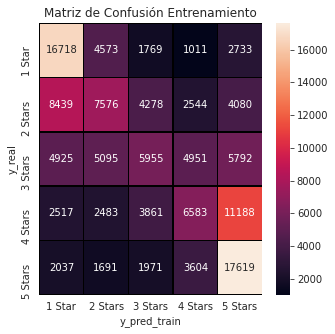

El valor de accuracy del modelo en la prueba es de: 0.399


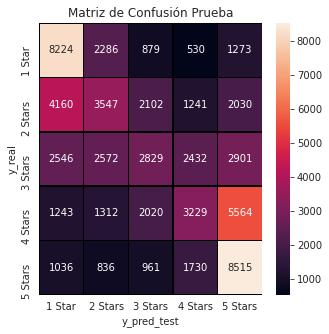

In [61]:
NB2.matriz_confusion(0.33)

#### Random Forest con TFIDF Vector

Para definir un modelo de Random Forest que trabaje con un vector TFIDF con la clase modelo debo colocar lo siguiente en los argumentos:

* Data: dataset['reviews_filtrados'].values
* Etiqueta: dataset['stars'].values
* Modelo: 'RF' (Clasificador Random Forest)
* Vector de palabras: 'TFIDF' (Tipo TFIDF)
* Número de features para el vector: 250 features
* Cantidad de Folds: 5
* Mínima frecuencia de palabra en dataset para incluir en el vector: 10
* Hiperparámetro: 250 árboles

In [62]:
RF2 = Modelo(dataset['reviews_filtrados'].values, 
              dataset['stars'].values, 'RF', 'TDIDF', 
              250, 5, 10, 250)

In [63]:
RF2.entrenar_modelo()

In [64]:
RF2.mostrar_resultados()

Los resultados de accuracy son: [0.445 0.439 0.441 0.442 0.448]
El resultado medio es: 0.443 ± 0.003


In [65]:
lista_resultado_modelos.append(['Random Forest TFIDF', 
                                RF2.resultado_medio, 
                                RF2.resultado_std])

El valor de accuracy del modelo en el entrenamiento es de: 0.936


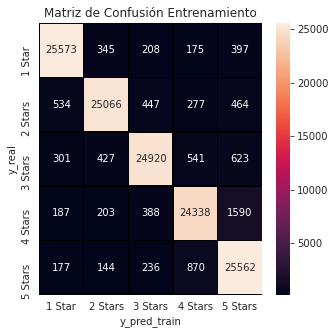

El valor de accuracy del modelo en la prueba es de: 0.44


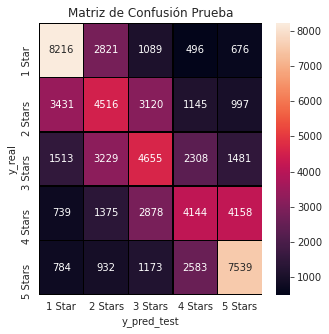

In [66]:
RF2.matriz_confusion(0.33)

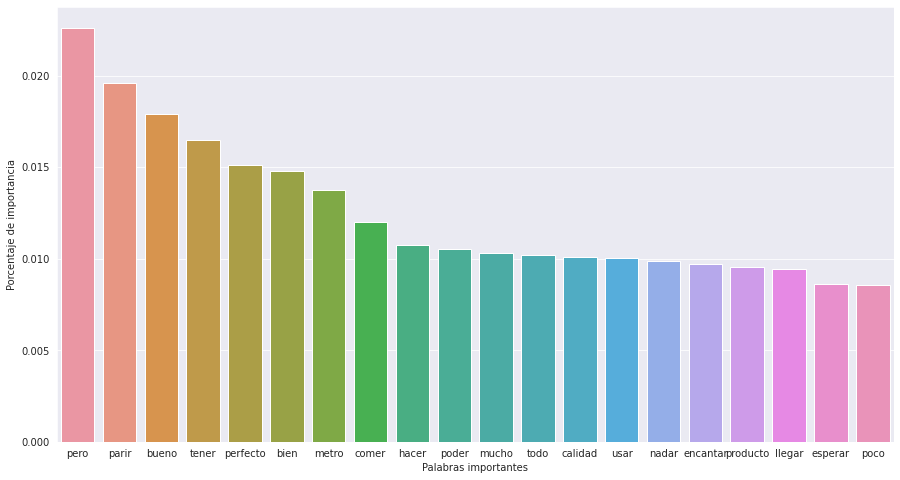

In [67]:
RF1.palabras_importantes()

#### AdaBoost con TFIDF Vector

Para definir un modelo de Adaboost que trabaje con un vector TFIDF con la clase modelo debo colocar lo siguiente en los argumentos:

* Data: dataset['reviews_filtrados'].values
* Etiqueta: dataset['stars'].values
* Modelo: 'ABC' (Clasificador AdaBoost)
* Vector de palabras: 'TFIDF' (Tipo TFIDF)
* Número de features para el vector: 250 features
* Cantidad de Folds: 5
* Mínima frecuencia de palabra en dataset para incluir en el vector: 10
* Hiperparámetro: 250 estimadores

In [68]:
ABC2 = Modelo(dataset['reviews_filtrados'].values, 
              dataset['stars'].values, 'ABC', 'TDIDF', 
              250, 5, 10, 250)

In [69]:
ABC2.entrenar_modelo()

In [70]:
ABC2.mostrar_resultados()

Los resultados de accuracy son: [0.45  0.447 0.448 0.446 0.45 ]
El resultado medio es: 0.448 ± 0.001


In [71]:
lista_resultado_modelos.append(['AdaBoost TFIDF', 
                                ABC2.resultado_medio, 
                                ABC2.resultado_std])

El valor de accuracy del modelo en el entrenamiento es de: 0.453


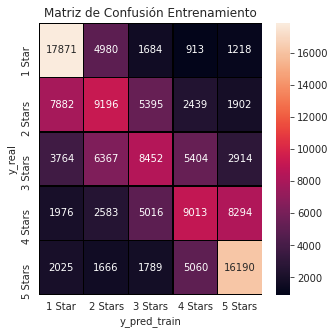

El valor de accuracy del modelo en la prueba es de: 0.447


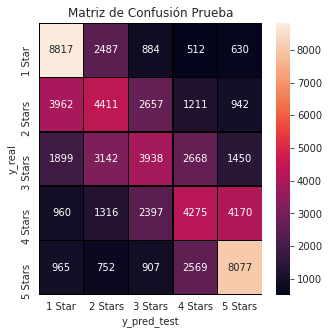

In [72]:
ABC2.matriz_confusion(0.33)

### Comparación de desempeños

Para elegir el mejor modelo para este problema el resultado de los modelos, debo realizar un análisis comparativo de sus resultados. Para ello, voy a tomar el valor promedio del desempeño de cada modelo y lo voy a graficar en un gráfico de barras. Luego, concluiré sobre cuál de todos es el mejor en base a ése gráfico.

In [73]:
lista_resultado_modelos

[['Naive Bayes Count', 0.379, 0.001],
 ['Random Forest Count', 0.431, 0.003],
 ['AdaBoost Count', 0.448, 0.001],
 ['Naive Bayes TFIDF', 0.402, 0.002],
 ['Random Forest TFIDF', 0.443, 0.003],
 ['AdaBoost TFIDF', 0.448, 0.001]]

Tomo el resultado promedio del desempeño

In [74]:
resultado = []
i = 0
while i < 6:
    resultado.append(lista_resultado_modelos[i][1] * 100)
    i = i + 1

In [75]:
modelos = ['Naive Bayes Count Vector', 'Random Forest Count Vector', 'AdaBoost Count Vector', 
           'Naive Bayes TFIDF Vector', 'Random Forest TFIDF Vector', 'AdaBoost TFIDF Vector']

Construyo el gráfico

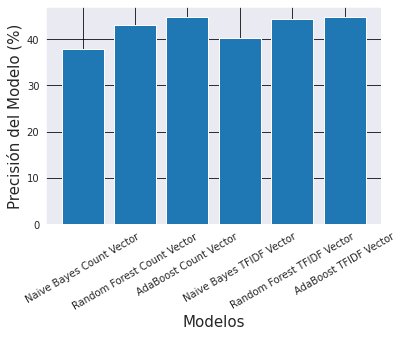

In [76]:
plt.bar(x = modelos, height = resultado)
plt.xticks(rotation = 30)
plt.xlabel('Modelos', fontsize = 15)
plt.ylabel('Precisión del Modelo (%)', fontsize = 15)
plt.grid(color = 'k')
plt.show()

En base a los resultados observados, puedo determinar que los 2 modelos de Adaboost son los que mejor se ajustan a clasificar este problema. Por lo tanto, serán los modelos con los que trabajaré en la parte de optimización de hiperparámetros

## Optimizar Hiperparámetros

Dado que ya definimos cuál es el modelo más apropiado, continuaremos esta parte tratando de optimizar los hiperparámetros del mismo para mejorar su resultado. En este caso, utilizaremos el método de la grilla para poder optimizar el modelo de Adaboost con Count Vector y probaremos con 150, 200, 250 y 300 estimadores

Para construir el método de la grilla, debo utilizar el método de clase "optimizar hiperparámetros". Con este método, puedo realizar la evaluación en grilla. Debo también colocar los siguientes argumentos:

* metodo: 'grid' (puede ser 'random' también si deseo utilizar optimización por búsqueda aleatoria)
* cantidad_estimadores: Defino la cantidad de modelos que deseo evaluar y comparar. Divide al rango de límites en n valores como haya colocado n estimadores
* limites: Defino el límite máximo y el mínimo sobre los cuales la cantidad de estimadores se dividirán equidistantemente
* cv: Cantidad de Folds con la que trabaja cada modelo

In [77]:
ABC1.optimizar_hiperparametros(metodo = 'grid', cantidad_estimadores = 4, limites = [150, 300], cv = 5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,136.140046,1.346730,5.371077,0.023724,150,{'n_estimators': 150},0.445861,0.443772,0.443372,0.445047,0.447297,0.445070,0.001425,4
1,177.660354,0.856293,7.118059,0.036745,200,{'n_estimators': 200},0.447636,0.447347,0.446697,0.446097,0.448372,0.447230,0.000781,3
2,217.531242,2.218898,8.743402,0.089055,250,{'n_estimators': 250},0.448686,0.448872,0.447822,0.447047,0.449447,0.448375,0.000844,2
3,260.892783,1.852856,10.489340,0.070547,300,{'n_estimators': 300},0.450611,0.449897,0.448172,0.446122,0.449522,0.448865,0.001584,1


Acá realizaremos lo mismo, pero con el modelo de Adaboost que trabajó con el vector TFIDF

In [78]:
ABC2.optimizar_hiperparametros(metodo = 'grid', cantidad_estimadores = 4, limites = [150, 300], cv = 5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,156.507883,1.315361,5.007726,0.021152,150,{'n_estimators': 150},0.444236,0.439422,0.441997,0.442522,0.445822,0.442800,0.002160,4
1,209.634931,1.380191,6.699770,0.036337,200,{'n_estimators': 200},0.448761,0.445922,0.445947,0.444547,0.449797,0.446995,0.001960,3
2,259.588235,1.293387,8.273317,0.026215,250,{'n_estimators': 250},0.449711,0.447172,0.448197,0.445947,0.449797,0.448165,0.001481,2
3,311.428922,1.126379,9.880056,0.029672,300,{'n_estimators': 300},0.449561,0.447247,0.448272,0.445897,0.451173,0.448430,0.001824,1


En ambos casos, se puede ver que el mejor modelo es el que posee 300 estimadores. Sin embargo, según lo observado en la matriz de confusión de la parte anterior se puede ver una clara evidencia de overfitting. Por lo tanto, habría que tomar ciertas medidas capaces de poder solucionar dicho problema en los modelos de AdaBoost utilizados

# Parte C - Investigación

## Próximos pasos a Realizar

Si bien los datos del problema se encuentran clasificados en 5 categorías, sería buena idea tratar de simplificarlo en interpretaciones más sencillas para poder sacar más ventaja del uso de algoritmos de Machine Learning. Por ejemplo, se podría transformar los comentarios que posean 1, 2 o 3 estrellas y reclasificarlos como "reviews no satisfactorios". De la misma manera, se podrían tomar reviews de 4 y de 5 estrellas y reclasificarlos como "reviews satisfactorios". Así, el modelo se encargaría de encontrar aquellos comentarios que presentan disconformidades en los clientes y los que presentan satisfacción del servicio. Por lo tanto, la empresa podría focalizarse en el ver cuáles son las causas que generan esos comentarios que manifiestan disconformidad para poder mitigarlas,
Otra cosa que se puede hacer para mejorar el proyecto es utilizar recursos de clasificación que sean más robustos y poderosos. Al ser datos escritos en formato string, se pueden utilizar redes neuronales recurrentes (RNN) como las redes LSTM o las GRU así como las redes neuronales convolucionales unidimensionales (CNN - Conv1D) de la librería Keras para ver si se puede mejorar la interpretabilidad de los datos de esta manera. Con estos recursos, puedo agregar también multiples inputs, por lo tanto, puedo incluir otros features como los títulos y las categorías del producto para que trabajen en armonía con los reviews y ver si aportan información extra útil para favorecer el aprendizaje del modelo de Machine Learning.

## Resultados Esperados

Como mencioné en el punto anterior, gracias a la simplificación de clases en 2, a la utilización de redes neuronales y a la aumentación de inputs; el resultado que se podría esperar es un **mejor desempeño del modelo**. Esto se debe a que el modelo contaría con una mayor cantidad de datos por clase (en este caso 2 clases) y a la utilización de recursos de Deep Learning que se ajustan mucho mejor a este tipo de problema (NLP). Sin embargo, hay que tener en cuenta que no se podrían utilizar los mismos recursos de vectorización de palabras dado que es no compatible con una red neuronal desarrollada en Keras los vectores Count y TFIDF. Por lo tanto, hay que cambiar estos vectores por una capa de Embedding capaz de vectorizar las palabras automáticamente al ingresar a la primer capa de la red.